In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import sys
import warnings
import timeit
import numpy as np
import scipy.optimize
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()
from shapely.geometry import LineString
from scipy.interpolate import UnivariateSpline
G=const.G.cgs.value
c=const.c.cgs.value
MSUN=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
KM=10**5
import math

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

plt.close()

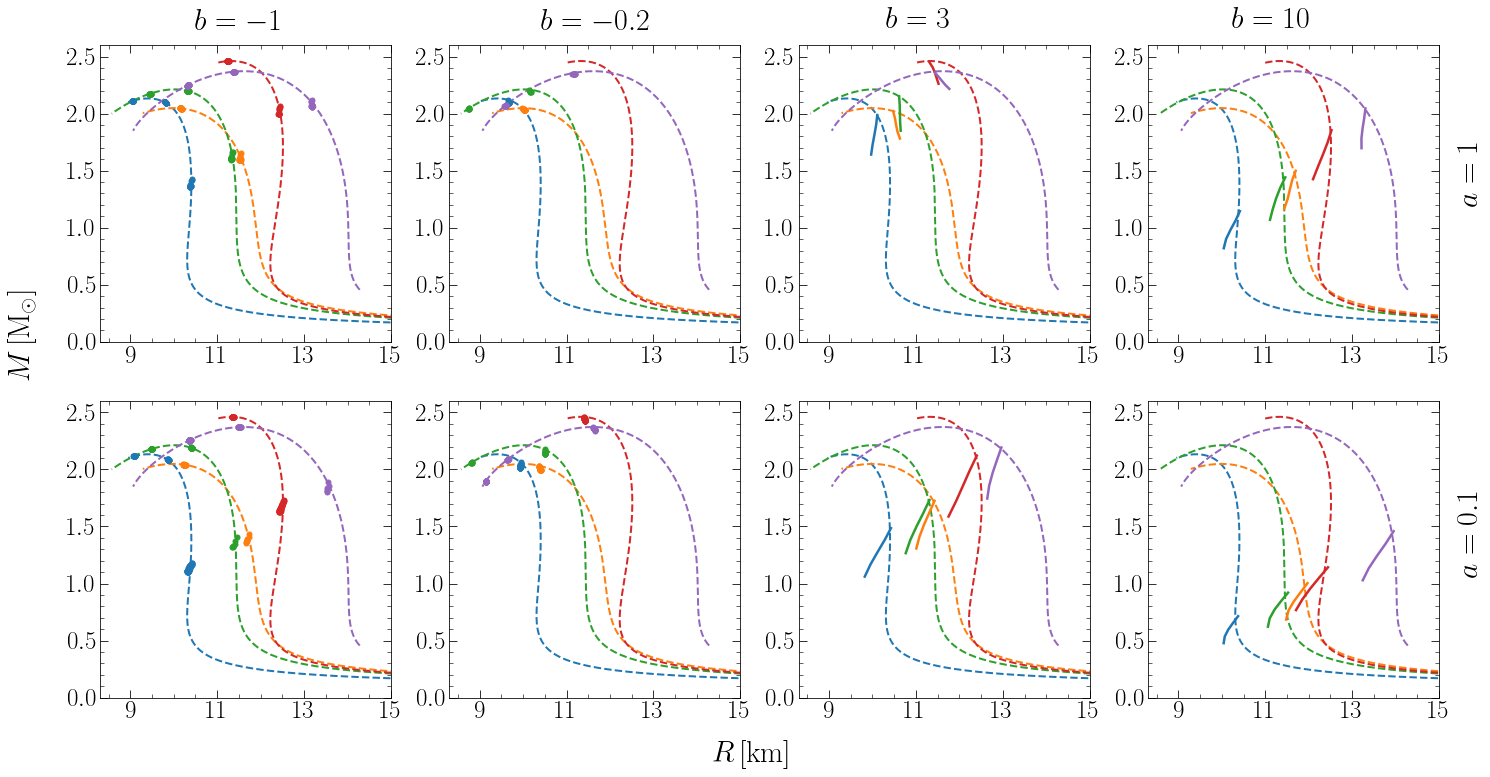

In [15]:
fig, axs = plt.subplots(2, 4,figsize=(24,12))
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.setp(axs, yticks=[0, 0.5, 1,1.5,2,2.5],xticks=[9,11,13,15])

for i in range(2):
    for j in range(4):
        for k in range(5):
            datagr=np.genfromtxt('TOV_5eqs_data'+str(k+1)+'.txt')
            M=datagr[:,1]
            R=datagr[:,2]
            axs[i,j].plot(R/10**5,M/Ms,color=colorset[k],linestyle='--',linewidth=2)
            axs[i,j].set_ylim(0,2.6)
            axs[i,j].set_xlim(8.3,15)
            axs[i,j].minorticks_on()
            
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata2'+str(i+1)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        axs[0,0].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
                     b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5)  

# the second plot
list2=[26,27,28,30]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_solver_pdata'+str(list2[i])+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        if a!=30:
            axs[0,1].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
            b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5) 
        else:
            axs[0,1].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
            b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i+1],markersize=5) 

# the third plot

for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(31+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[0,2].plot(xs,ys, color = colorset[i],markersize=5,linewidth=2.5) 
        
# the fourth plot

for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(36+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[0,3].plot(xs,ys, color = colorset[i],markersize=5,linewidth=2.5)

# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(i+1)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        axs[1,0].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
                     b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5) 
        
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(i+6)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        axs[1,1].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
                     b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5) 
        
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(11+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[1,2].plot(xs,ys, color = colorset[i],markersize=5,linewidth=2.5)
        
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(16+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[1,3].plot(xs,ys, color = colorset[i],markersize=5,linewidth=2.5)
        
# plot decorations and labels

fig.text(0.08, 0.5, r'$M\,[{\rm M_{\odot}}]$', ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$R\,[\rm km]$' ,fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("MR.pdf", format='pdf', bbox_inches="tight")

Text(0.78, 0.9, '$\\xi=10$')

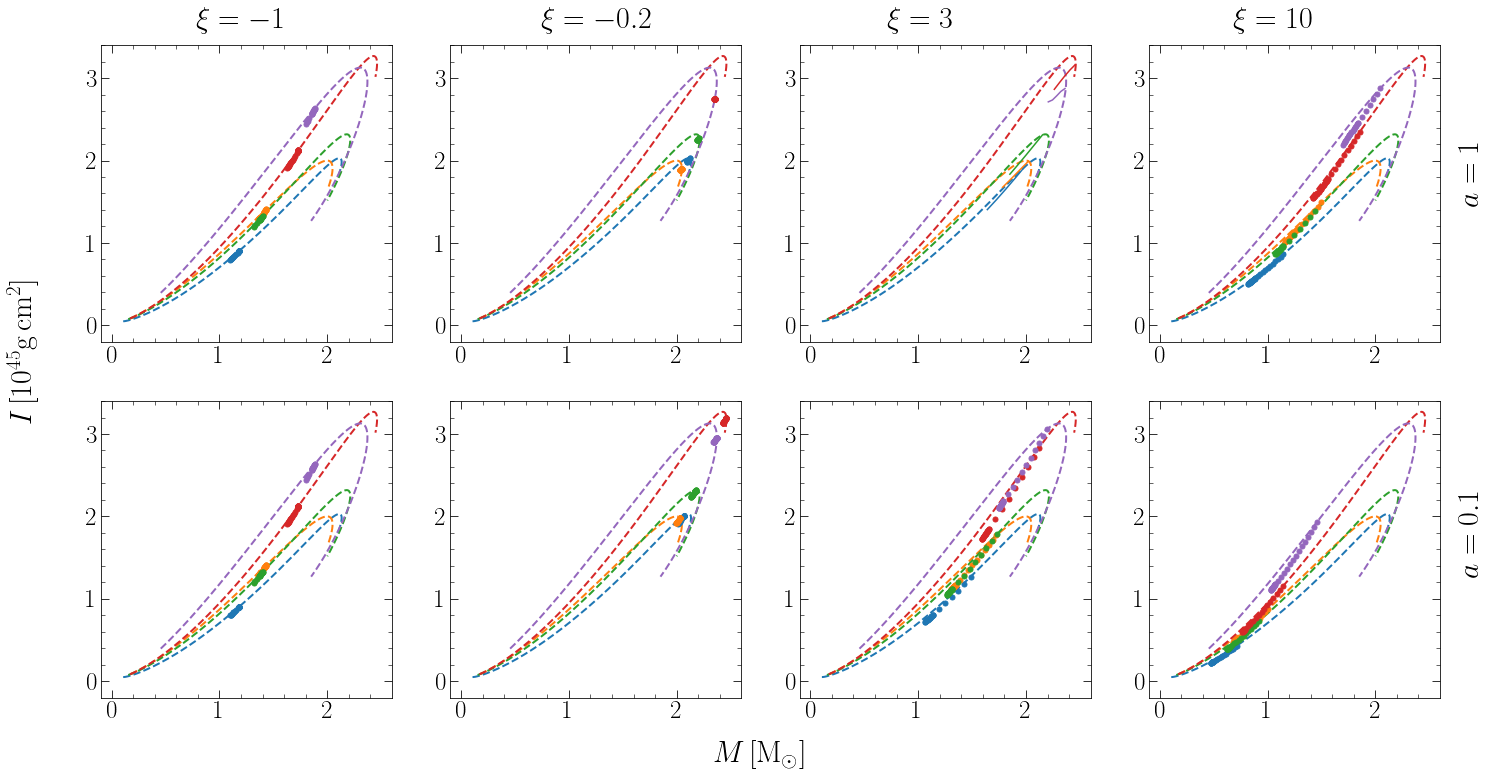

In [5]:
fig, axs = plt.subplots(2, 4,figsize=(24,12))
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
# plt.setp(axs, yticks=[0, 0.5, 1,1.5,2,2.5],xticks=[9,11,13,15])

for i in range(2):
    for j in range(4):
        for k in range(5):
            datagr=np.genfromtxt('TOV_5eqs_data'+str(k+1)+'.txt')
            M=datagr[:,1]
            I=datagr[:,4]
            axs[i,j].plot(M/Ms,I/10**45,color=colorset[k],linestyle='--',linewidth=2)
            axs[i,j].set_ylim(-0.2,3.4)
            axs[i,j].set_xlim(-0.1,2.6)
            axs[i,j].minorticks_on()
            
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    axs[0,0].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
    

# the second plot
list2=[26,27,28,30]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45 
    if a!=30:
        axs[0,1].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
   
    else:
        axs[0,1].plot(x21, y21, 'o', color = colorset[i],markersize=5)  

# the third plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(31+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),5)
    ys=s1(xs)
    
    axs[0,2].plot(xs,ys, color = colorset[i]) 
        
# the fourth plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(36+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    axs[0,3].plot(x21, y21, 'o', color = colorset[i],markersize=5) 

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(1+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    axs[1,0].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
      
# the sixth plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    axs[1,1].plot(x21, y21, 'o', color = colorset[i],markersize=5)  
      
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(11+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    axs[1,2].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
      
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(16+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/10**45
    axs[1,3].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
            
                       
fig.text(0.08, 0.45,r'$I\,[10^{45}\rm g\,cm^{2}]$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ \rm M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='90')     
fig.text(0.18, 0.9, r'$\xi=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$\xi=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$\xi=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$\xi=10$' ,fontsize=30)  

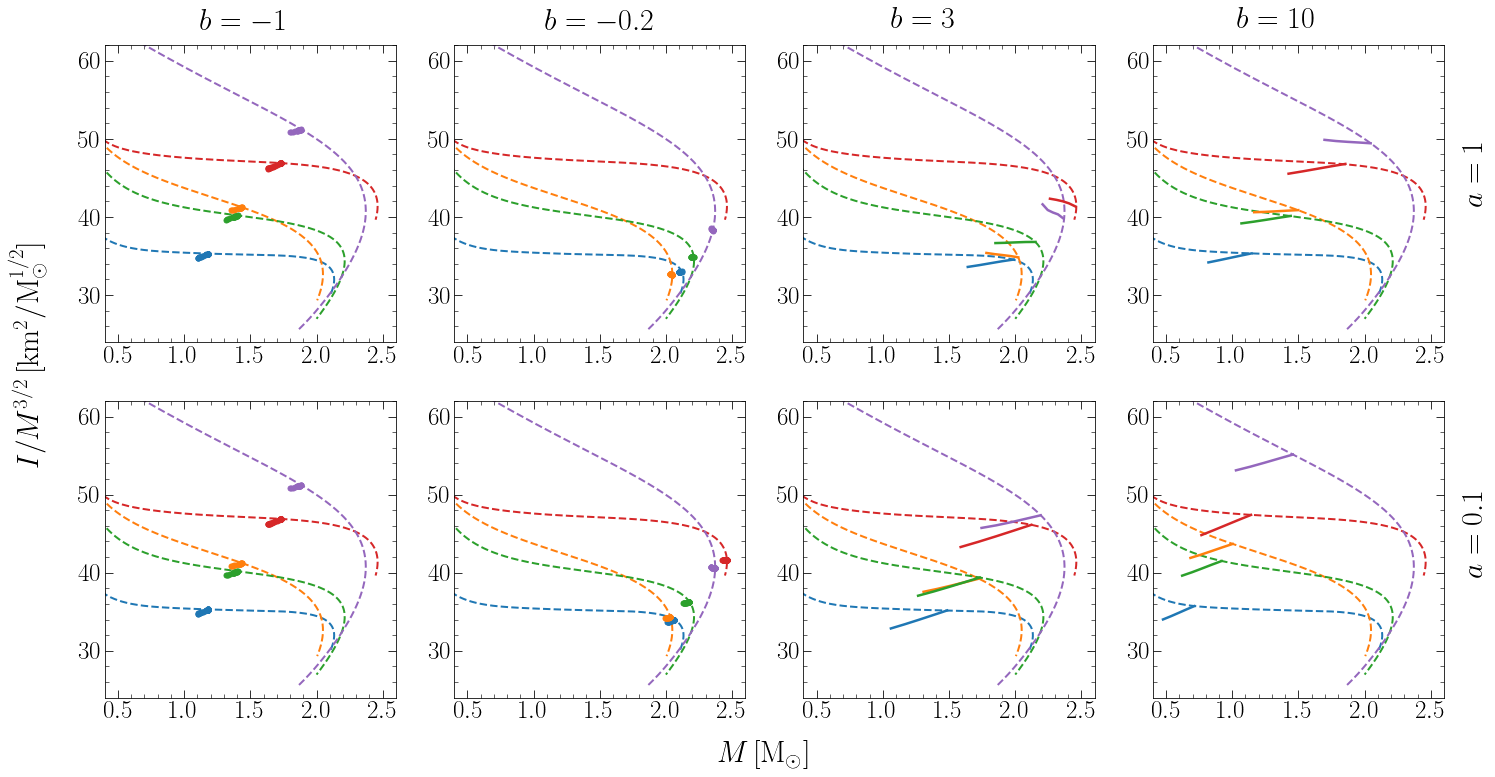

In [14]:
fig, axs = plt.subplots(2, 4,figsize=(24,12),linewidth=2)
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

for i in range(2):
    for j in range(4):
        for k in range(5):
            datagr=np.genfromtxt('TOV_5eqs_data'+str(k+1)+'.txt')
            M=datagr[:,1]
            I=datagr[:,4]/M**(3/2)*MSUN**(1/2)/KM**2 
            axs[i,j].plot(M/Ms,I,color=colorset[k],linestyle='--',linewidth=2)
            axs[i,j].set_ylim(24,62)
            axs[i,j].set_xlim(0.4,2.6)
            axs[i,j].minorticks_on()
            
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    axs[0,0].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
    

# the second plot
list2=[26,27,28,30]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2 
    if a!=30:
        axs[0,1].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
   
    else:
        axs[0,1].plot(x21, y21, 'o', color = colorset[i+1],markersize=5)  

# the third plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(31+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),5)
    ys=s1(xs)
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=2.5) 
        
# the fourth plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(36+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),5)
    ys=s1(xs)
    axs[0,3].plot(xs, ys, color = colorset[i],linewidth=2.5) 

# the fifth plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(1+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    axs[1,0].plot(x21, y21, 'o', color = colorset[i],markersize=5) 
      
# the sixth plot

for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    axs[1,1].plot(x21, y21, 'o', color = colorset[i],markersize=5)  
      
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(11+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),5)
    ys=s1(xs)
    axs[1,2].plot(xs, ys, color = colorset[i],linewidth=2.5) 
      
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(16+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/c321**(3/2)*MSUN**(1/2)/KM**2
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),5)
    ys=s1(xs)
    axs[1,3].plot(xs, ys, color = colorset[i],linewidth=2.5)
            
            
            
                      
fig.text(0.08, 0.40,r'$I/M^{3/2}\,[\rm km^{2}/M_{\odot}^{1/2}]$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ \rm M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("MOI.pdf", format='pdf', bbox_inches="tight")

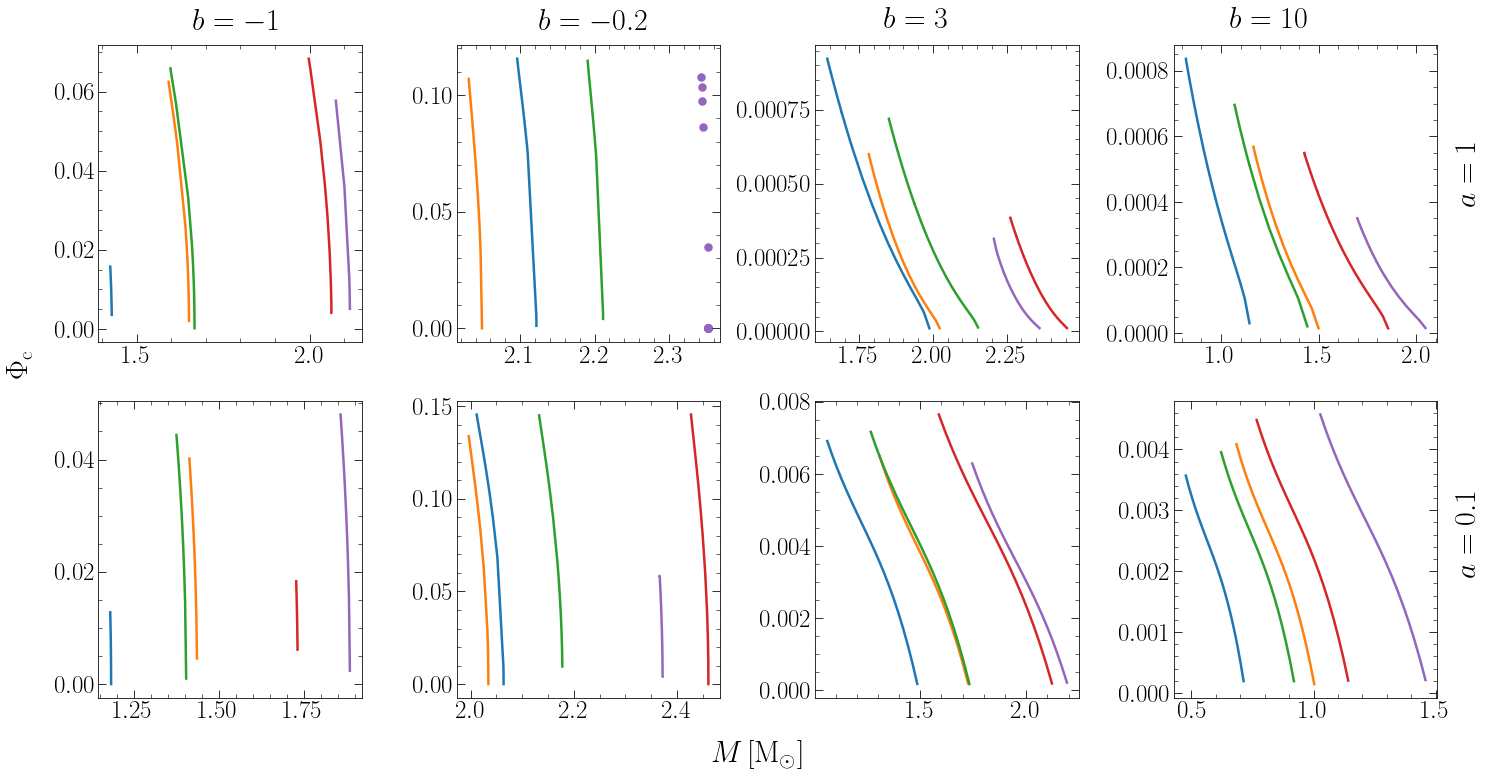

In [13]:
fig, axs = plt.subplots(2, 4,figsize=(24,12),linewidth=2)
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.subplots_adjust(wspace=0.36)
# plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])
# from matplotlib import ticker
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True) 
# formatter.set_powerlimits((-5,-3)) 
# axs[0,2].yaxis.set_major_formatter(formatter)
# axs[0,2].set_yticks([2.5*10**(-4)])
ntrim1, ntrim2, ntrim3, ntrim4, ntrim5 = 10, 13, 12, 10, 13
ntrim10 = 16
ntrim_second=([ntrim1, ntrim2, ntrim3, ntrim4, ntrim5])

ntrim21, ntrim22, ntrim23, ntrim24, ntrim25 = 9, 27, 26, 15, 8
ntrim30 = 14
ntrim_first=np.array([ntrim21, ntrim22, ntrim23, ntrim24, ntrim25])

for i in range(2):
    for j in range(4):
        axs[i,j].minorticks_on()
        
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+21)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[0,0].plot(b321[0:ntrim_first[i]]/MSUN, b121[0:ntrim_first[i]], color = colorset[i],linewidth=2.5) 

list2=[26,27,28,30]
# the second plot
for i in range(4):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7]
    if list2[i]!=30:
        axs[0,1].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    else:
        axs[0,1].scatter(b321[0:ntrim30]/MSUN, b121[0:ntrim30], color = colorset[i+1],linewidth=2.5) 
        
# the third plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+31)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[0,2].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    
    
# the fourth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+36)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[0,3].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    
# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[1,0].plot(b321[0:ntrim_second[i]]/MSUN, b121[0:ntrim_second[i]], color = colorset[i],linewidth=2.5) 
    
    
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7]
    if i!=4:
        axs[1,1].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    else:
        axs[1,1].plot(b321[0:ntrim10]/MSUN, b121[0:ntrim10], color = colorset[i],linewidth=2.5)
        
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+11)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
#     axs[1,2].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    index=b321.argsort()
    ydata=b121[index]
    xdata=b321[index]/MSUN
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),20)
    ys=s1(xs)
    axs[1,2].plot(xs, ys, color = colorset[i],linewidth=2.5) 
    
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+16)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
#     axs[1,3].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    index=b321.argsort()
    ydata=b121[index]
    xdata=b321[index]/MSUN
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),20)
    ys=s1(xs)
    axs[1,3].plot(xs, ys, color = colorset[i],linewidth=2.5)
    
fig.text(0.08, 0.50,r'$\Phi_{\rm c}$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ \rm M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("Phic.pdf", format='pdf', bbox_inches="tight")